In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [82]:
# Get correlations
CORRELATIONS = pd.read_csv("../output/05_correlations.tsv", sep='\t')

# Get model names
CORRELATIONS['FullModelName1'] = ["-".join((i,j,k)) for i,j,k in zip(CORRELATIONS['Pathogen1'], CORRELATIONS['Task1'], CORRELATIONS['Model1'])]
CORRELATIONS['FullModelName2'] = ["-".join((i,j,k)) for i,j,k in zip(CORRELATIONS['Pathogen2'], CORRELATIONS['Task2'], CORRELATIONS['Model2'])]

# Get all models
ALL_MODELS = set(CORRELATIONS['FullModelName1']).union(CORRELATIONS['FullModelName1'])

# Get correlations
name_to_spearman = {(i,j): [k,l] for i,j,k,l in zip(CORRELATIONS['FullModelName1'], CORRELATIONS['FullModelName2'], 
                                            CORRELATIONS['Spearman statistic'], CORRELATIONS['Spearman pvalue'])}

In [83]:
# Set correlation matrix to build
labels = [i for i in sorted(ALL_MODELS) if i.split("-")[2] == 'NB']

# Get model inds
name_to_ind = {name: c for c, name in enumerate(sorted(labels))}

# Build matrix
X = np.zeros((len(labels), len(labels)))

# Fill the matrix
for lab1 in labels:
    for lab2 in labels:
        t = tuple(sorted((lab1, lab2)))
        X[name_to_ind[lab1]][name_to_ind[lab2]] = name_to_spearman[t][0]

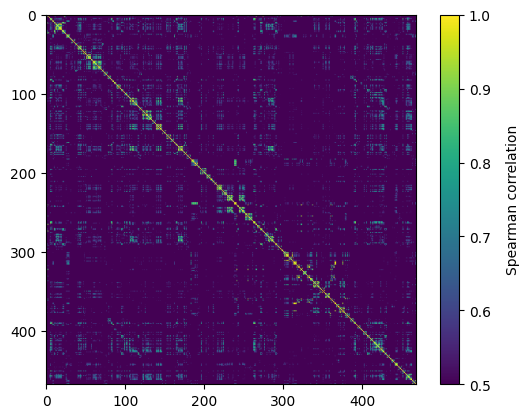

In [102]:
plt.imshow(X, vmin=0.5, vmax=1)
cbar = plt.colorbar()
cbar.set_label('Spearman correlation', labelpad=11)
plt.show()